## Email Spam detection using Naive Bayes

1. Prior: P(y)
2. Posterior (result) : P(y|x)
3. Classes: In case of syptoms: mild,severe (All the y's)

In [2]:
!wget https://lazyprogrammer.me/course_files/spam.csv


--2024-07-27 14:31:48--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: 'spam.csv'

     0K .......... .......... .......... .......... .......... 10% 1,80M 0s
    50K .......... .......... .......... .......... .......... 20%  796K 0s
   100K .......... .......... .......... .......... .......... 30%  549K 0s
   150K .......... .......... .......... .......... .......... 40% 1,04M 0s
   200K .......... .......... .......... .......... .......... 50%  749K 0s
   250K .......... .......... .......... .......... .......... 60%  913K 0s
   300K .......... .......... .......... .......... .......... 71%  843K 0s
   350K .......... .......... .......... .......... .......... 81%  496K 0s
   400K .......... .......... .......... .........

In [22]:
# import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, confusion_matrix
import seaborn as sns


In [2]:
df = pd.read_csv('spam.csv',delimiter=",",encoding='ISO-8859-1')
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])
df = df.rename(columns={"v1":"Labels","v2":"Texts"})

labels = df["Labels"]
texts = df["Texts"]

# Display the first few rows of the DataFrame
print(df.head())

  Labels                                              Texts
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...


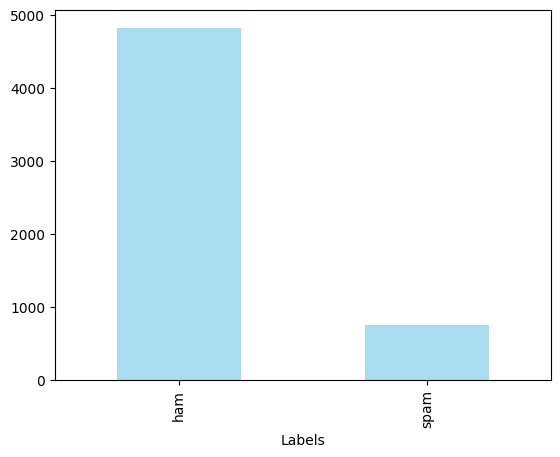

73.18736539842068


In [3]:
#Check for class imbalance

test_plots = df['Labels'].value_counts()
test_plots.plot(kind='bar', color='skyblue', alpha=0.7)
plt.show()
print((test_plots.iloc[0]-test_plots.iloc[1])/(test_plots.iloc[1]+test_plots.iloc[0])*100)


In [18]:
pipeline2 = Pipeline([
    ('Vectorize',CountVectorizer(decode_error='ignore')),
    ('Multinomial',MultinomialNB())
])
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(lowercase=True, stop_words='english')),
    ('nb', MultinomialNB())
])

In [19]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.3, random_state=42)


In [20]:
# Train the model
pipeline.fit(X_train, y_train)

pipeline2.fit(X_train,y_train)

Pipeline(steps=[('Vectorize', CountVectorizer(decode_error='ignore')),
                ('Multinomial', MultinomialNB())])

In [31]:
# Make predictions and evaluate
y_pred = pipeline2.predict(X_test)
y_pred_train = pipeline2.predict(X_train)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9820574162679426


In [32]:
# F1 metric
print("f1 score ",f1_score(y_test,y_pred,pos_label='spam'))
print("f1 score  on train",f1_score(y_train,y_pred_train,pos_label='spam'))

f1 score  0.9282296650717703
f1 score  on train 0.9809523809523809


f1 score  0.9711225711565113
f1 score on train 0.9954207331320319
ROC-AUC Score: 0.9711225711565113


Text(0.5, 1.0, 'Receiver Operating Characteristic')

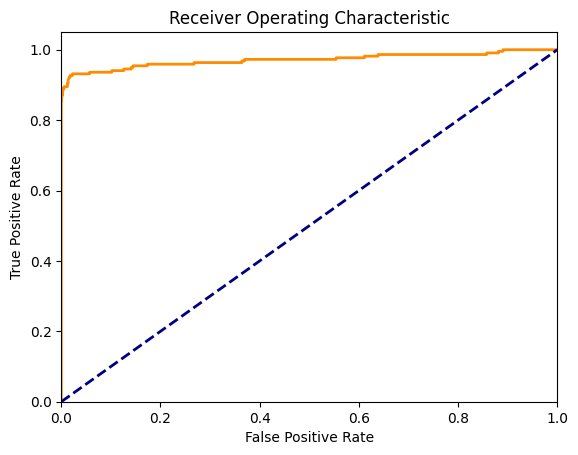

In [35]:
# Roc AUc
y_pred = pipeline2.predict_proba(X_test)[:,1]
y_pred_train = pipeline2.predict_proba(X_train)[:,1]
print("f1 score ",roc_auc_score(y_test,y_pred))
print("f1 score on train",roc_auc_score(y_train,y_pred_train))




# Convert labels to binary format
y_test_binary = [1 if label == 'spam' else 0 for label in y_test]

# Extract probabilities for the positive class (assumes 'spam' is the positive class)
y_proba_positive = [probs for probs in y_pred]  # Probabilities for 'spam'

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test_binary, y_proba_positive)
print(f'ROC-AUC Score: {roc_auc}')

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test_binary, y_proba_positive)
roc_auc = auc(fpr, tpr)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')

In [ ]:
# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()